In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, confusion_matrix

In [79]:
df = pd.read_csv("donnees_2023.csv", sep=",")

In [80]:
df.columns

Index(['N°DPE', 'Date_réception_DPE', 'Date_établissement_DPE',
       'Date_visite_diagnostiqueur', 'Modèle_DPE', 'N°_DPE_remplacé',
       'Date_fin_validité_DPE', 'Version_DPE', 'N°_DPE_immeuble_associé',
       'Appartement_non_visité_(0/1)',
       ...
       'Nom Commune', 'Segment de client', 'Nombre de logements',
       'Consommation annuelle totale de l'adresse (MWh)',
       'Consommation annuelle moyenne par logement de l'adresse (MWh)',
       'Consommation annuelle moyenne de la commune (MWh)', 'Code EPCI',
       'Code Département', 'Code Région', 'Tri des adresses'],
      dtype='object', length=261)

In [81]:
# Sélection des variables explicatives
features = ["Année_construction", "Surface_habitable_logement",
            "Type_énergie_principale_chauffage", "Type_énergie_principale_ECS"]

df = df.dropna(subset=features + ["Conso_5_usages_é_finale", "Classe_DPE"])

In [82]:

# Encodage des variables catégoriques
encoder = LabelEncoder()
df["Type_énergie_principale_chauffage"] = encoder.fit_transform(df["Type_énergie_principale_chauffage"])
df["Type_énergie_principale_ECS"] = encoder.fit_transform(df["Type_énergie_principale_ECS"])
df["Classe_DPE_encoded"] = encoder.fit_transform(df["Classe_DPE"])  # Transformer A, B, C... en nombres


In [83]:

# Définition des variables
X = df[features]
y = df["Conso_5_usages_é_finale"]

# Séparation train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle de régression linéaire
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [84]:
# Prédictions et évaluation
y_pred = reg_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE : {mae:.2f} kWh")
print(f"R² Score : {r2:.2f}")


MAE : 1495.77 kWh
R² Score : 0.63


In [85]:
for col in df.columns:
    print(col)

N°DPE
Date_réception_DPE
Date_établissement_DPE
Date_visite_diagnostiqueur
Modèle_DPE
N°_DPE_remplacé
Date_fin_validité_DPE
Version_DPE
N°_DPE_immeuble_associé
Appartement_non_visité_(0/1)
Méthode_application_DPE
N°_immatriculation_copropriété
Invariant_fiscal_logement
N°_RPLS_logement
Etiquette_GES
Classe_DPE
Année_construction
Type_bâtiment
Type_installation_chauffage
Type_installation_ECS_(général)
Période_construction
Hauteur_sous-plafond
Nombre_appartement
Nombre_niveau_immeuble
Nombre_niveau_logement
Surface_habitable_immeuble
Surface_habitable_logement
Surface_tertiaire_immeuble
Classe_inertie_bâtiment
Typologie_logement
Position_logement_dans_immeuble
Classe_altitude
Zone_climatique_
Adresse_brute
Nom__commune_(BAN)
Code_INSEE_(BAN)
N°_voie_(BAN)
Identifiant__BAN
Adresse_(BAN)
Code_postal_(BAN)
Score_BAN
Nom__rue_(BAN)
Coordonnée_cartographique_X_(BAN)
Coordonnée_cartographique_Y_(BAN)
Code_postal_(brut)
N°_étage_appartement
Nom_résidence
Complément_d'adresse_bâtiment
Cage_d'es

In [86]:
# Ajout de variables supplémentaires
features_extended = ["Année_construction", "Surface_habitable_logement",
                     "Type_énergie_principale_chauffage", "Type_énergie_principale_ECS", "Type_installation_chauffage", "Qualité_isolation_enveloppe",
                     "Classe_inertie_bâtiment", "Déperditions_murs", "Deperditions_planchers_bas", "Deperditions_planchers_hauts", "Déperditions_renouvellement_air",
                     "Zone_climatique_", "Type_ventilation", "Production_électricité_PV_(kWhep/an)", "Typologie_logement"]


In [87]:
df_model_extended = df.dropna(subset=features_extended + ["Conso_5_usages_é_finale"])

In [88]:
print(df[features_extended].dtypes)


Année_construction                      float64
Surface_habitable_logement              float64
Type_énergie_principale_chauffage         int64
Type_énergie_principale_ECS               int64
Type_installation_chauffage              object
Qualité_isolation_enveloppe              object
Classe_inertie_bâtiment                  object
Déperditions_murs                       float64
Deperditions_planchers_bas              float64
Deperditions_planchers_hauts            float64
Déperditions_renouvellement_air         float64
Zone_climatique_                         object
Type_ventilation                         object
Production_électricité_PV_(kWhep/an)    float64
Typologie_logement                       object
dtype: object


In [89]:

# Liste des colonnes à encoder
colonnes_a_encoder = ["Classe_inertie_bâtiment", "Zone_climatique_", "Type_ventilation", "Type_installation_chauffage", "Qualité_isolation_enveloppe", "Typologie_logement"]

# Encoder chaque colonne catégorique
encoder = LabelEncoder()
for col in colonnes_a_encoder:
    if col in df.columns:
        df[col] = encoder.fit_transform(df[col])

# Vérification des types après encodage
print(df[features_extended].dtypes)


Année_construction                      float64
Surface_habitable_logement              float64
Type_énergie_principale_chauffage         int64
Type_énergie_principale_ECS               int64
Type_installation_chauffage               int64
Qualité_isolation_enveloppe               int64
Classe_inertie_bâtiment                   int64
Déperditions_murs                       float64
Deperditions_planchers_bas              float64
Deperditions_planchers_hauts            float64
Déperditions_renouvellement_air         float64
Zone_climatique_                          int64
Type_ventilation                          int64
Production_électricité_PV_(kWhep/an)    float64
Typologie_logement                        int64
dtype: object


In [90]:

# Vérification des valeurs uniques de la colonne
print("Valeurs uniques de Classe_inertie_bâtiment :", df["Classe_inertie_bâtiment"].unique())


Valeurs uniques de Classe_inertie_bâtiment : [0 1 2 3]


In [91]:

# Définition des variables
X = df[features_extended]
y = df["Conso_5_usages_é_finale"]

# Séparation train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle de régression linéaire
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [92]:
# Suppression des échantillons contenant des valeurs manquantes
X_train_clean = X_train.dropna()

# Si y_train a des valeurs correspondantes manquantes, les supprimer également
y_train_clean = y_train[X_train_clean.index]

reg_model = LinearRegression()
reg_model.fit(X_train_clean, y_train_clean)


LinearRegression()

In [93]:
# Prédictions et évaluation
y_pred = reg_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE : {mae:.2f} kWh")
print(f"R² Score : {r2:.2f}")

MAE : 1126.51 kWh
R² Score : 0.74


Modélisation de la Classe DPE avec un modèle de classification multi-couches (MLP) pour prédire la Classe DPE en fonction des caractéristiques d’un logement.

In [94]:

df = df.dropna(subset=features_extended + ["Classe_DPE"])

# Encodage des variables catégoriques
df["Type_énergie_principale_chauffage"] = encoder.fit_transform(df["Type_énergie_principale_chauffage"])
df["Type_énergie_principale_ECS"] = encoder.fit_transform(df["Type_énergie_principale_ECS"])
df["Classe_DPE_encoded"] = encoder.fit_transform(df["Classe_DPE"])  # Transformer A, B, C... en 0, 1, 2...

X = df[features_extended]
y = df["Classe_DPE_encoded"]

# Séparation train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modèle MLP
mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='relu', solver='adam',
                    max_iter=1000, random_state=42)

print("⏳ Entraînement du modèle...")
mlp.fit(X_train_scaled, y_train)

# Prédictions
y_pred = mlp.predict(X_test_scaled)

# Importance des variables
importances = np.abs(mlp.coefs_[0]).sum(axis=1)

# Affichage des résultats
feature_importance = pd.DataFrame({"Feature": features_extended, "Importance": importances})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)
display(feature_importance)


⏳ Entraînement du modèle...


,Feature,Importance
1,Surface_habitable_logement,24.085501
0,Année_construction,21.070163
5,Qualité_isolation_enveloppe,20.926228
6,Classe_inertie_bâtiment,20.359145
8,Deperditions_planchers_bas,18.826215
3,Type_énergie_principale_ECS,17.174288
4,Type_installation_chauffage,16.926822
10,Déperditions_renouvellement_air,16.069515
7,Déperditions_murs,15.599267
2,Type_énergie_principale_chauffage,15.286798



Les variables les plus influentes sur le DPE sont :

Surface du logement → Plus un logement est grand, plus il consomme d’énergie.

Année de construction → Les bâtiments récents ont de meilleures performances thermiques.

Qualité de m'isolation et Déperditions thermiques (murs, planchers, inertie, ventilation) → L’isolation joue un rôle clé.

Type d’énergie utilisée (chauffage et eau chaude) → Les énergies fossiles et électriques sont souvent moins performantes.

Améliorer un DPE passe par :

Améliorer l’isolation (murs, planchers, fenêtres).
Optimiser le chauffage (remplacer par une pompe à chaleur ou chaudière gaz à condensation).
Installer une meilleure ventilation pour éviter les pertes de chaleu




In [95]:
# Calcul de la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f" Précision du modèle (Accuracy) : {accuracy:.2f}")

📊 Précision du modèle (Accuracy) : 0.75


Problème :

Les classes F et G sont sous-représentées → Le modèle a surement du mal à les prédire.
Les classes C et D dominent → Le modèle pourrait trop souvent prédire C ou D, même quand la vraie classe est F ou G.

Impact possible :

Biais du modèle → Il privilégie les classes majoritaires (C, D).
Mauvaise précision sur les petites classes (F, G).

In [96]:
print("Type de y_test :", y_test.dtype)
print("Type de y_pred :", y_pred.dtype)

print("Valeurs uniques dans y_test :", np.unique(y_test))
print("Valeurs uniques dans y_pred :", np.unique(y_pred))


Type de y_test : int64
Type de y_pred : int64
Valeurs uniques dans y_test : [0 1 2 3]
Valeurs uniques dans y_pred : [0 1 2 3]


In [97]:
y_pred = np.round(y_pred).astype(int)
y_test = y_test.astype(int)  # Assurer que y_test est aussi en int

In [98]:
y_pred = np.argmax(mlp.predict_proba(X_test_scaled), axis=1)


In [99]:
import numpy as np

print("🔍 Vérification des valeurs de `y_test` et `y_pred` :")
print("Type de y_test :", type(y_test))
print("Type de y_pred :", type(y_pred))

print("\nValeurs uniques dans y_test :", np.unique(y_test))
print("Valeurs uniques dans y_pred :", np.unique(y_pred))


🔍 Vérification des valeurs de `y_test` et `y_pred` :
Type de y_test : <class 'pandas.core.series.Series'>
Type de y_pred : <class 'numpy.ndarray'>

Valeurs uniques dans y_test : [0 1 2 3]
Valeurs uniques dans y_pred : [0 1 2 3]


In [100]:
y_test = np.array(y_test)
y_pred = np.array(y_pred)


In [101]:
y_pred = np.round(y_pred).astype(int)
y_test = y_test.astype(int)
y_train= y_train.astype(int)



C:\Users\Admin.local\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


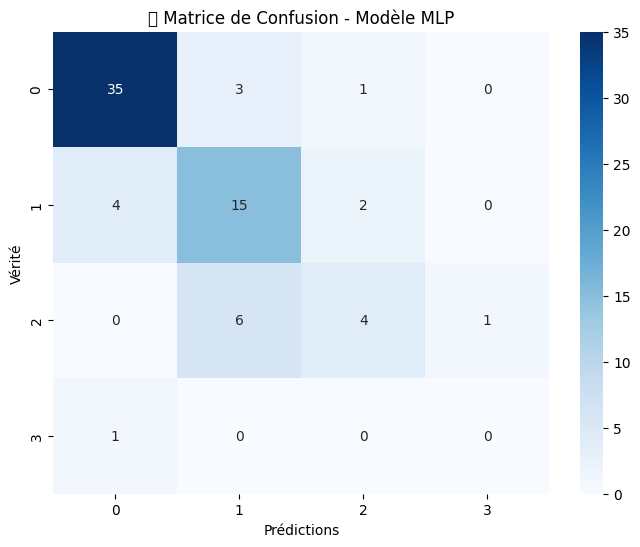

In [102]:


# Vérifier que y_pred et y_test sont bien en int
y_pred = y_pred.astype(int)
y_test = y_test.astype(int)

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Affichage propre
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=sorted(set(y_test)), 
            yticklabels=sorted(set(y_test)))

plt.xlabel("Prédictions")
plt.ylabel("Vérité")
plt.title("🔍 Matrice de Confusion - Modèle MLP")
plt.show()


In [103]:
from sklearn.utils.class_weight import compute_class_weight

In [104]:
y_train.dtype

dtype('int64')

In [105]:
# Calculer les poids des classes automatiquement
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)

# Transformer en dictionnaire pour l'utiliser dans la loss du MLP
class_weight_dict = {cls: weight for cls, weight in zip(np.unique(y_train), class_weights)}

print("🔍 Poids des classes :", class_weight_dict)

🔍 Poids des classes : {np.int64(0): np.float64(0.37402597402597404), np.int64(1): np.float64(0.6620689655172414), np.int64(2): np.float64(1.6), np.int64(3): np.float64(8.228571428571428), np.int64(4): np.float64(14.4)}


In [106]:
# Calcul de la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"📊 Précision du modèle (Accuracy) : {accuracy:.2f}")

📊 Précision du modèle (Accuracy) : 0.75


Plan de test

Je choisis un logement existant dans le dataset.
Je modifie certaines valeurs pour simuler une rénovation énergétique.
Je prédit son DPE avant et après l’amélioration.
Je compare l'impact des modifications.

In [107]:
#  un logement aléatoire
logement = df.sample(1, random_state=42)

# Affichage des caractéristiques initiales du logement
print("🏠 Logement sélectionné avant rénovation :\n", logement[features_extended])
print("\nDPE initial :", logement["Classe_DPE"].values[0])


🏠 Logement sélectionné avant rénovation :
      Année_construction  Surface_habitable_logement  \
320              1996.0                        43.0   

     Type_énergie_principale_chauffage  Type_énergie_principale_ECS  \
320                                  3                            1   

     Type_installation_chauffage  Qualité_isolation_enveloppe  \
320                            2                            1   

     Classe_inertie_bâtiment  Déperditions_murs  Deperditions_planchers_bas  \
320                        0              377.4                        99.1   

     Deperditions_planchers_hauts  Déperditions_renouvellement_air  \
320                         786.6                            715.0   

     Zone_climatique_  Type_ventilation  Production_électricité_PV_(kWhep/an)  \
320                 0                 0                                   0.0   

     Typologie_logement  
320                   0  

DPE initial : E


In [108]:
# Simulation d'une rénovation énergétique
logement_ameliore = logement.copy()

# Exemples de modifications :
logement_ameliore["Type_énergie_principale_chauffage"] = 1  # Ex : Passer du chauffage électrique à une PAC
logement_ameliore["Classe_inertie_bâtiment"] = 2  # Ex : Isolation renforcée
logement_ameliore["Conso_chauffage_é_finale"] *= 0.7  # Ex : -30% de consommation chauffage après travaux
logement_ameliore["Conso_5_usages_é_finale"] *= 0.8  # Ex : -20% de consommation totale

# Affichage des caractéristiques après rénovation
print("\n🏠 Logement après rénovation :\n", logement_ameliore[features_extended])



🏠 Logement après rénovation :
      Année_construction  Surface_habitable_logement  \
320              1996.0                        43.0   

     Type_énergie_principale_chauffage  Type_énergie_principale_ECS  \
320                                  1                            1   

     Type_installation_chauffage  Qualité_isolation_enveloppe  \
320                            2                            1   

     Classe_inertie_bâtiment  Déperditions_murs  Deperditions_planchers_bas  \
320                        2              377.4                        99.1   

     Deperditions_planchers_hauts  Déperditions_renouvellement_air  \
320                         786.6                            715.0   

     Zone_climatique_  Type_ventilation  Production_électricité_PV_(kWhep/an)  \
320                 0                 0                                   0.0   

     Typologie_logement  
320                   0  


Entraîner d'un modèle MLP pour prédire le DPE avant et après rénovation.

In [109]:

# Sélection des variables pour l'entraînement
X = df[features_extended]
y = df["Classe_DPE_encoded"]

# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraînement d' un MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Prédiction du DPE initial
dpe_initial = mlp.predict(scaler.transform(logement[features_extended]))[0]

# Prédiction du DPE après rénovation
dpe_ameliore = mlp.predict(scaler.transform(logement_ameliore[features_extended]))[0]

# Décoder la classe DPE
dpe_initial_label = encoder.inverse_transform([dpe_initial])[0]
dpe_ameliore_label = encoder.inverse_transform([dpe_ameliore])[0]

print("\n Comparaison du DPE avant/après rénovation")
print(f" DPE initial : {dpe_initial_label}")
print(f" DPE après rénovation : {dpe_ameliore_label}")



 Comparaison du DPE avant/après rénovation
 DPE initial : E
 DPE après rénovation : D


Comparaison dans un groupe de logement existant dans le dataset.

In [110]:

# Définir les critères pour sélectionner un groupe homogène
groupe_logements = df[
    (df["Surface_habitable_logement"].between(80, 120)) &  # Ex: logements entre 80 et 120m²
    (df["Type_énergie_principale_chauffage"] == 2) &  # Ex: logements chauffés à l'électricité (ex: valeur encodée)
    (df["Année_construction"].between(1970, 1990))  # Ex: logements construits entre 1970 et 1990
].copy()

# Vérifier le nombre de logements sélectionnés
print(f"📊 Nombre de logements similaires sélectionnés : {groupe_logements.shape[0]}")

# Afficher un aperçu des logements sélectionnés
print(groupe_logements[["Surface_habitable_logement", "Année_construction", "Type_énergie_principale_chauffage", "Classe_DPE"]].head())


📊 Nombre de logements similaires sélectionnés : 0
Empty DataFrame
Columns: [Surface_habitable_logement, Année_construction, Type_énergie_principale_chauffage, Classe_DPE]
Index: []


In [111]:
print("📊 Valeurs uniques de 'Surface_habitable_logement' :")
display(df["Surface_habitable_logement"].describe())  # Voir min/max
print("\n📊 Valeurs uniques de 'Type_énergie_principale_chauffage' :")
display(df["Type_énergie_principale_chauffage"].unique())  
print("\n📊 Valeurs uniques de 'Année_construction' :")
display(df["Année_construction"].describe())  # Voir min/max


📊 Valeurs uniques de 'Surface_habitable_logement' :


count    360.000000
mean      60.443056
std       18.838818
min       18.600000
25%       46.300000
50%       63.600000
75%       73.700000
max      123.700000
Name: Surface_habitable_logement, dtype: float64


📊 Valeurs uniques de 'Type_énergie_principale_chauffage' :


array([3, 1, 2, 0])


📊 Valeurs uniques de 'Année_construction' :


count     360.000000
mean     1988.997222
std        17.720281
min      1930.000000
25%      1977.000000
50%      1994.000000
75%      2007.000000
max      2016.000000
Name: Année_construction, dtype: float64

In [112]:
groupe_logements = df[
    (df["Surface_habitable_logement"].between(40, 65)) &  # Changement de la plage
    (df["Type_énergie_principale_chauffage"].isin([ 3])) &  # Accepter plusieurs types de chauffage
    (df["Année_construction"].between(1970, 1999))  # Changement de la période
].copy()

# Vérifier si la sélection fonctionne
print(f"📊 Nombre de logements similaires sélectionnés : {groupe_logements.shape[0]}")
display(groupe_logements[["Surface_habitable_logement", "Année_construction", "Type_énergie_principale_chauffage", "Classe_DPE","Conso_chauffage_é_finale", "Conso_5_usages_é_finale"]].head())


📊 Nombre de logements similaires sélectionnés : 45


,Surface_habitable_logement,Année_construction,Type_énergie_principale_chauffage,Classe_DPE,Conso_chauffage_é_finale,Conso_5_usages_é_finale
3,51.8,1997.0,3,D,3841.8,5619.8
5,62.4,1996.0,3,D,3200.3,5605.4
7,61.6,1997.0,3,E,5987.3,7925.7
10,48.9,1997.0,3,E,4672.9,6395.7
15,43.0,1996.0,3,E,3430.1,5648.7


In [119]:
# Créer une copie des données pour tester l'amélioration
groupe_ameliore = groupe_logements.copy()

#  Changer le type de chauffage (ex: passer au chauffage n°1, qui pourrait être une PAC)
groupe_ameliore["Type_énergie_principale_chauffage"] = 1

#  Améliorer l’isolation (réduction de la consommation de chauffage de 30%)
groupe_ameliore["Conso_chauffage_é_finale"] *= 0.7

#  Réduire la consommation globale de 20%
groupe_ameliore["Conso_5_usages_é_finale"] *= 0.8

# Vérifier les modifications
print("\n Modifications appliquées :")
display(groupe_ameliore[["Type_énergie_principale_chauffage", "Conso_chauffage_é_finale", "Conso_5_usages_é_finale"]].head())



 Modifications appliquées :


,Type_énergie_principale_chauffage,Conso_chauffage_é_finale,Conso_5_usages_é_finale
3,1,2689.26,4495.84
5,1,2240.21,4484.32
7,1,4191.11,6340.56
10,1,3271.03,5116.56
15,1,2401.07,4518.96


In [120]:


# Sélection des variables pertinentes pour la prédiction
features = ["Année_construction", "Surface_habitable_logement",
            "Type_énergie_principale_chauffage", "Conso_5_usages_é_finale", "Conso_chauffage_é_finale"]

# Encoder la classe DPE
encoder = LabelEncoder()
df["Classe_DPE_encoded"] = encoder.fit_transform(df["Classe_DPE"])

# Séparer les données en train/test
X = df[features]
y = df["Classe_DPE_encoded"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraîner un MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Prédire le DPE avant amélioration
dpe_avant = mlp.predict(scaler.transform(groupe_logements[features]))

# Prédire le DPE après amélioration
dpe_apres = mlp.predict(scaler.transform(groupe_ameliore[features]))

# Convertir en labels lisibles
dpe_avant_labels = encoder.inverse_transform(dpe_avant)
dpe_apres_labels = encoder.inverse_transform(dpe_apres)

# Ajouter les résultats dans le DataFrame
groupe_logements["DPE_avant"] = dpe_avant_labels
groupe_ameliore["DPE_apres"] = dpe_apres_labels

# Comparaison des résultats
comparison = groupe_logements[["Surface_habitable_logement", "Année_construction", "DPE_avant"]].copy()
comparison["DPE_apres"] = groupe_ameliore["DPE_apres"]

# Afficher les résultats
print("\n Comparaison du DPE avant et après amélioration :")
display(comparison.head())



 Comparaison du DPE avant et après amélioration :


,Surface_habitable_logement,Année_construction,DPE_avant,DPE_apres
3,51.8,1997.0,D,C
5,62.4,1996.0,D,C
7,61.6,1997.0,E,C
10,48.9,1997.0,E,C
15,43.0,1996.0,E,C


 Objectif : Prédire la consommation électrique des foyers français et quantifier l'impact des rénovations

3️) Analyser la contribution des variables à la prédiction (SHAP, coefficients, importance des features) 
4️) Créer un outil simulant les économies suite à une rénovation 

1️) Explorer les variables influençant la consommation électrique 


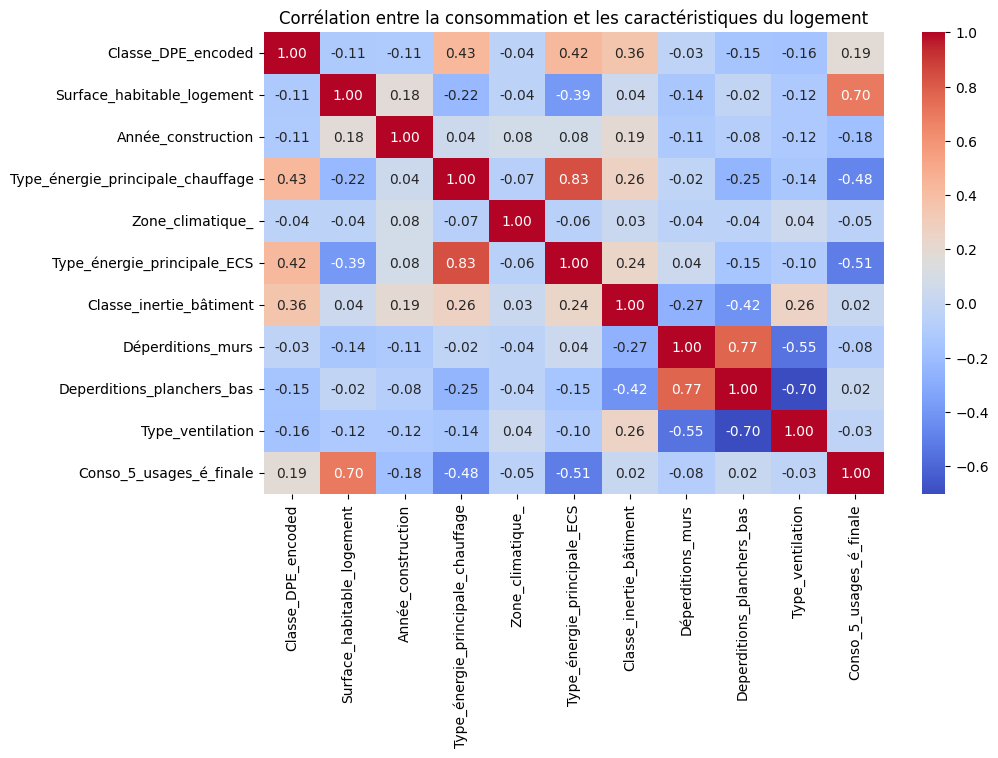

In [115]:
# Conversion Classe_DPE en valeurs numériques
df["Classe_DPE_encoded"] = df["Classe_DPE"].astype("category").cat.codes

# Liste des features
features_to_check = ["Classe_DPE_encoded", "Surface_habitable_logement", "Année_construction",
                     "Type_énergie_principale_chauffage", "Zone_climatique_", "Type_énergie_principale_ECS",
                     "Classe_inertie_bâtiment", "Déperditions_murs", "Deperditions_planchers_bas",
                     "Type_ventilation", 
                     "Conso_5_usages_é_finale"]

# Matrice de corrélation 
plt.figure(figsize=(10,6))
sns.heatmap(df[features_to_check].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Corrélation entre la consommation et les caractéristiques du logement")
plt.show()


2️) Construction du modèle de prédiction de la consommation électrique 


In [116]:


# Sélection des variables
features = ["Classe_DPE", "Surface_habitable_logement", "Année_construction",
            "Type_énergie_principale_chauffage", "Zone_climatique_"]
target = "Conso_5_usages_é_finale"

# Séparation en train/test
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Encodage des variables catégoriques et normalisation
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), ["Surface_habitable_logement", "Année_construction"]),
    ("cat", OneHotEncoder(handle_unknown="ignore"), ["Classe_DPE", "Type_énergie_principale_chauffage", "Zone_climatique_"])
])

# Modèle de régression
model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=100, random_state=42))
])

# Entraînement
model.fit(X_train, y_train)

# Prédiction et évaluation
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, r2_score
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f} kWh")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")


MAE: 748.00 kWh
R² Score: 0.80


🔄 Entraînement du modèle...
MAE : 703.64 kWh
 R² Score : 0.82


C:\Users\Admin.local\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


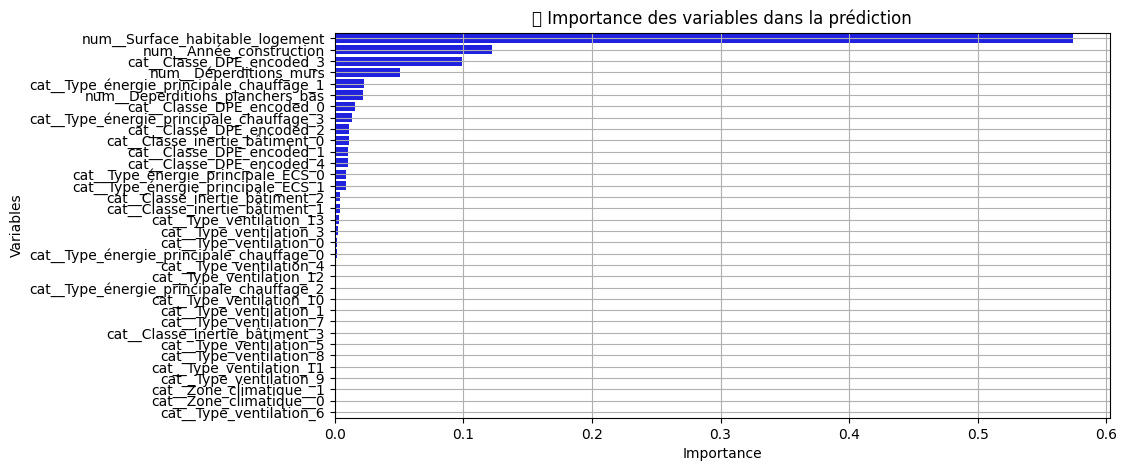

In [121]:


#  Sélection des nouvelles variables
features = [
    "Classe_DPE_encoded", "Surface_habitable_logement", "Année_construction",
    "Type_énergie_principale_chauffage", "Zone_climatique_", "Type_énergie_principale_ECS",
    "Classe_inertie_bâtiment", "Déperditions_murs", "Deperditions_planchers_bas",
    "Type_ventilation"
]
target = "Conso_5_usages_é_finale"

#  Séparation en train/test
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

#  Prétraitement des variables catégoriques et normalisation des numériques
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), ["Surface_habitable_logement", "Année_construction", "Déperditions_murs", "Deperditions_planchers_bas"]),
    ("cat", OneHotEncoder(handle_unknown="ignore"), ["Classe_DPE_encoded", "Type_énergie_principale_chauffage", "Zone_climatique_", "Type_énergie_principale_ECS", "Classe_inertie_bâtiment", "Type_ventilation"])
])

#  Modèle de régression
model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=200, random_state=42))
])

#  Entraînement du modèle
print("🔄 Entraînement du modèle...")
model.fit(X_train, y_train)

#  Prédictions et évaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE : {mae:.2f} kWh")
print(f" R² Score : {r2:.2f}")

#  Importance des variables
importances = model.named_steps["regressor"].feature_importances_
feature_names = preprocessor.get_feature_names_out()
feature_importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances}).sort_values(by="Importance", ascending=False)

#  Affichage des features les plus importantes
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.barplot(data=feature_importance_df, x="Importance", y="Feature", color="blue")
plt.xlabel("Importance")
plt.ylabel("Variables")
plt.title("📊 Importance des variables dans la prédiction")
plt.grid(True)
plt.show()


 Analyse de la contribution des variables à la prédiction 

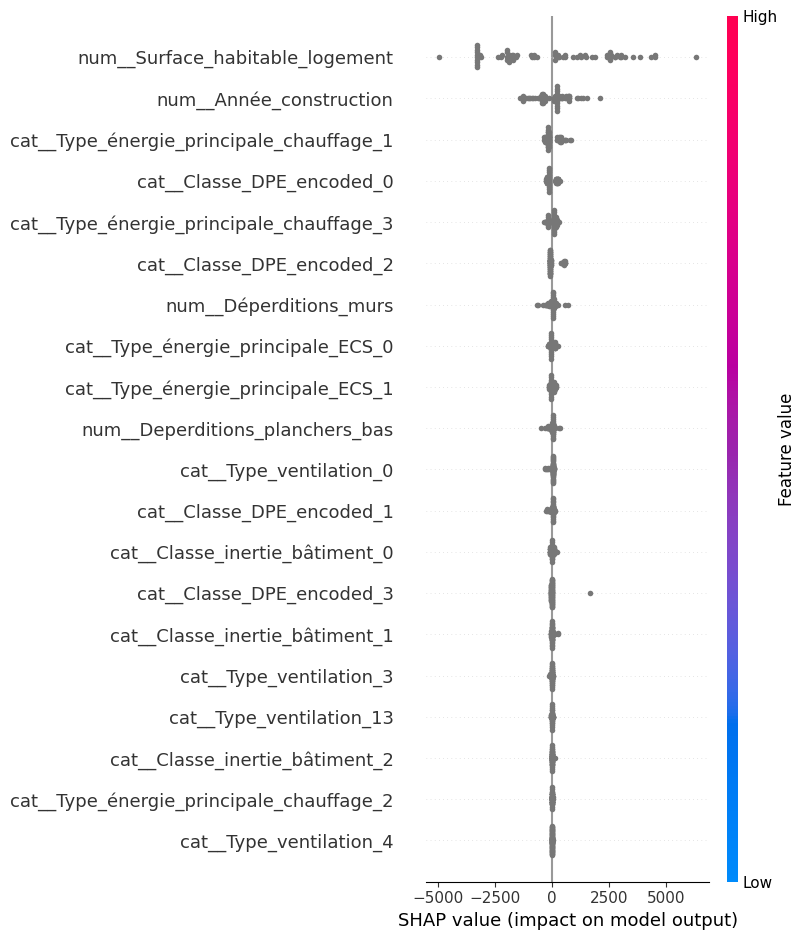

In [133]:
import shap

# 📌 Transformation des données
X_test_transformed = model.named_steps["preprocessor"].transform(X_test)
feature_names = model.named_steps["preprocessor"].get_feature_names_out()

# 📌 Visualisation avec les vrais noms des variables
shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names)



In [124]:

# Vérifier si X_test_transformed est une matrice sparse
if hasattr(X_test_transformed, "toarray"):  
    X_test_transformed = X_test_transformed.toarray()  # Convertir en array NumPy

# Optionnel : Convertir en DataFrame pour SHAP avec les bons noms de colonnes
X_test_transformed = pd.DataFrame(X_test_transformed, columns=feature_names)

# Vérifier le type
print("✅ Format corrigé :", type(X_test_transformed))


✅ Format corrigé : <class 'pandas.core.frame.DataFrame'>


In [125]:
#  Création de l'explainer avec le format corrigé
explainer = shap.Explainer(model.named_steps["regressor"], X_test_transformed)
shap_values = explainer(X_test_transformed, check_additivity=False)


In [126]:
import numpy as np
import numba

print("NumPy Version :", np.__version__)  # Doit afficher 2.1.0
print("Numba Version :", numba.__version__)  # Doit afficher une version récente


NumPy Version : 2.1.0
Numba Version : 0.61.0


Construction d'un outil simulant les économies après rénovation

In [130]:
def simulate_renovation(df, classe_dpe_avant, classe_dpe_apres, reduction_chauffage=0.3):
    """
    Simule l'effet d'une amélioration du DPE sur la consommation électrique.
    Réduction de 30% de la consommation chauffage par défaut.
    """
    # Sélection des logements concernés
    df_filtered = df[df["Classe_DPE"] == classe_dpe_avant].copy()
    
    # Réduction de la consommation de chauffage
    df_filtered["Conso_chauffage_é_finale"] *= (1 - reduction_chauffage)
    
    # Mise à jour du DPE
    df_filtered["Classe_DPE"] = classe_dpe_apres
    
    # Nouvelle consommation totale après rénovation
    df_filtered["Nouvelle_conso_é_finale"] = df_filtered["Conso_5_usages_é_finale"] - (df_filtered["Conso_chauffage_é_finale"] * reduction_chauffage)
    
    # Calcul de l'économie d'énergie et en euros
    economie_kWh = df_filtered["Conso_5_usages_é_finale"] - df_filtered["Nouvelle_conso_é_finale"]
    economie_euros = economie_kWh * 0.2062  # Prix moyen de l'électricité
    
    return df_filtered[["Classe_DPE", "Nouvelle_conso_é_finale", "Conso_5_usages_é_finale", "Conso_chauffage_é_finale"]], economie_kWh.mean(), economie_euros.mean()

# Test : Simulation d'une amélioration de DPE E → C
df_simule, gain_kWh, gain_euros = simulate_renovation(df, "E", "C")

print(f" Gain moyen par logement : {gain_kWh:.2f} kWh/an")
print(f" Économie moyenne : {gain_euros:.2f} €/an")


 Gain moyen par logement : 1298.17 kWh/an
 Économie moyenne : 267.68 €/an


In [132]:
def simulate_renovation(df, classe_dpe_avant, classe_dpe_apres, 
                        reduction_chauffage=0.3, reduction_pertes=0.2, reduction_ecs=0.15):
    """
    Simule l'effet d'une amélioration du DPE sur la consommation électrique.
    
    - reduction_chauffage : Réduction de la consommation de chauffage après rénovation (par défaut 30%).
    - reduction_pertes : Réduction des déperditions thermiques (par défaut 20%).
    - reduction_ecs : Réduction de la consommation liée à l'eau chaude sanitaire (par défaut 15%).
    """

    #  Sélection des logements concernés
    df_filtered = df[df["Classe_DPE"] == classe_dpe_avant].copy()

    #  Réduction de la consommation de chauffage
    df_filtered["Conso_chauffage_é_finale"] *= (1 - reduction_chauffage)

    #  Réduction des pertes thermiques (murs + planchers)
    df_filtered["Déperditions_murs"] *= (1 - reduction_pertes)
    df_filtered["Deperditions_planchers_bas"] *= (1 - reduction_pertes)

    #  Réduction de la consommation ECS (eau chaude sanitaire)
    df_filtered["Conso_ECS_é_finale"] *= (1 - reduction_ecs)

    #  Mise à jour du DPE
    df_filtered["Classe_DPE"] = classe_dpe_apres

    #  Nouvelle consommation totale après rénovation
    df_filtered["Nouvelle_conso_é_finale"] = (
        df_filtered["Conso_5_usages_é_finale"]
        - df_filtered["Conso_chauffage_é_finale"] * reduction_chauffage
        - df_filtered["Conso_ECS_é_finale"] * reduction_ecs
    )

    #  Calcul des économies
    economie_kWh = df_filtered["Conso_5_usages_é_finale"] - df_filtered["Nouvelle_conso_é_finale"]
    economie_euros = economie_kWh * 0.2062  # Prix moyen de l'électricité en €/kWh

    return (
        df_filtered[["Classe_DPE", "Nouvelle_conso_é_finale", "Conso_5_usages_é_finale", 
                     "Conso_chauffage_é_finale", "Conso_ECS_é_finale", "Déperditions_murs"]],
        economie_kWh.mean(),
        economie_euros.mean()
    )

#  Test : Simulation d'une amélioration de DPE E → C
df_simule, gain_kWh, gain_euros = simulate_renovation(df, "E", "C")

print(f" Gain moyen par logement : {gain_kWh:.2f} kWh/an")
print(f" Économie moyenne : {gain_euros:.2f} €/an")


 Gain moyen par logement : 1529.89 kWh/an
 Économie moyenne : 315.46 €/an
